## Welcome to Jupyter Notebook

This is a Jupyter Notebook. It works just like python console, but you can freely go back and forth and reexecute pieces (cells) of code.

To run code press Shift+Enter

In [1]:
a = 2

In [2]:
a += 2

In [3]:
print a

4


I can do to the second cell and run it again and again making "a" bigger and bigger.

You can always reset the "state" of the notebook by doing "Kernel->Restart". You can also rerun all of the cells from the top, by doing "Cell->Run all". Try it now.

Jupyter allows you to run any bash command by using the exclamation mark "!":

In [4]:
!ls -al

total 488
drwxr-xr-x@  5 poldrack  staff     170 Aug 29 23:07 .
drwxr-xr-x@ 19 poldrack  staff     646 Aug 29 22:58 ..
drwxr-xr-x@  3 poldrack  staff     102 Aug 29 23:01 .ipynb_checkpoints
-rw-r--r--@  1 poldrack  staff  243576 Aug 29 23:07 Introduction to notebooks, plotting, nilearn, nibabel and nipype.ipynb
-rw-r--r--@  1 poldrack  staff      17 Aug 29 23:05 test.txt


You can use variables defined in python in the bash calls using brackets "{}":

In [5]:
name = "Chris"
text = "My name is " + name
!echo "{text}" > test.txt
!cat test.txt

My name is Chris


It's easy to get help in the notebook - just follow a command with question mark '?'

In [6]:
int?

## Plotting

To plot data in python we are going to use matplotlib and seaborn.

In [7]:
import pylab as plt
import seaborn as sns

We'll nead numpy for generating some random data

In [8]:
import numpy as np

In [9]:
random_data = np.random.rand(10,10)
plt.plot(random_data)

Where is the plot?!? We need to explicitly tell notebookto put it inline

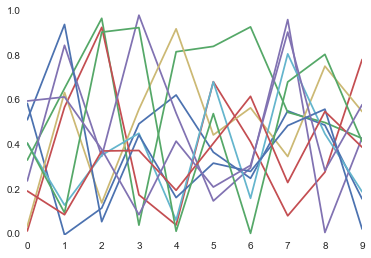

In [10]:
%matplotlib inline
plt.plot(random_data)

We can also plot a scatterplot

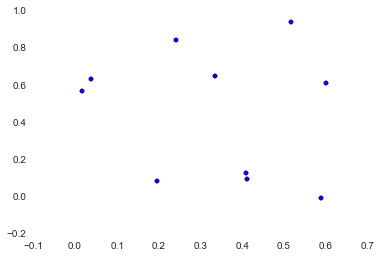

In [11]:
plt.scatter(random_data[0,:], random_data[1,:])

We can also plot an array:

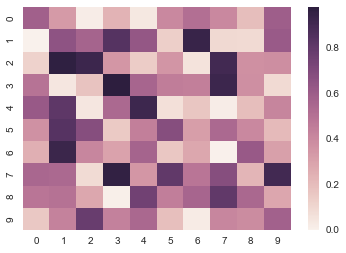

In [12]:
sns.heatmap(random_data)

Histograms

shape of random_data: (10, 10)
shape of random_data.ravel(): (100,)


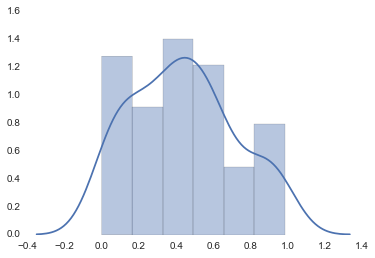

In [13]:
print 'shape of random_data:',random_data.shape
print 'shape of random_data.ravel():',random_data.ravel().shape
sns.distplot(random_data.ravel())

__Exercise__: sample data from a __normal__ distribution and plot it distribution

## Reading NIFTI files using nibabel

Nibabel is librabry for reading and writing to various neuroimaging data formats

In [14]:
import nibabel as nb
import os

In [30]:
datadir="../../../data/ds003"
if not os.path.exists(datadir):
    # custom location for Russ's laptop
    datadir='/Users/poldrack/data_unsynced/ds003'
boldfile=os.path.join(datadir,"sub001/BOLD/task001_run001/bold.nii.gz")
nii = nb.load(boldfile)

We can read shape and headers of a nifti file without loading it into memory

In [16]:
nii.shape

(64, 64, 33, 160)

In [17]:
header = nii.get_header()
header.get_xyzt_units()

('mm', 'sec')

In [18]:
nii.get_affine()

array([[ -3.125 ,   0.    ,   0.    ,  98.4375],
       [  0.    ,   3.125 ,   0.    , -98.4375],
       [  0.    ,   0.    ,   4.    , -64.    ],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

We can also get the data:

(64, 64, 33, 160)


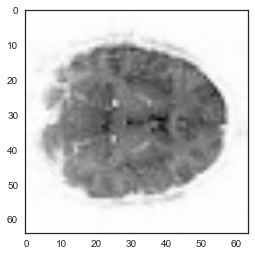

In [19]:
data = nii.get_data()
print data.shape
sns.set_style("white")
plt.imshow(data[:,:,10,1])

We can create new files

In [20]:
new_nii = nb.Nifti1Image(np.random.rand(*(nii.shape[:-1])), nii.get_affine())
new_nii.to_filename("/tmp/test.nii.gz")

In [21]:
!fslview /tmp/test.nii.gz

Task: load an anatomical scan from "../../../data/ds003/sub001/anatomy/inplane.nii.gz" threshold it and save the data back to a file in your home directory


## Image manipulation using nilearn

nilearn is a python package for doing machine learning in neuroimaging. We will primarly use it to plot and manipulate images

In [22]:
import nilearn.plotting, nilearn.image

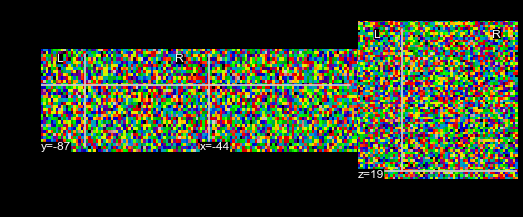

In [23]:
nilearn.plotting.plot_epi(new_nii)

In [25]:
nilearn.plotting.plot_epi(nii)

DimensionError: Data must be a 3D Niimg-like object but you provided a 4D image. See http://nilearn.github.io/building_blocks/manipulating_mr_images.html#niimg.

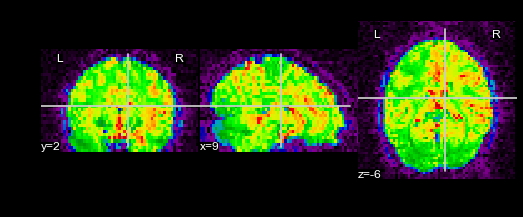

In [26]:
nilearn.plotting.plot_epi(nilearn.image.index_img(nii,0))

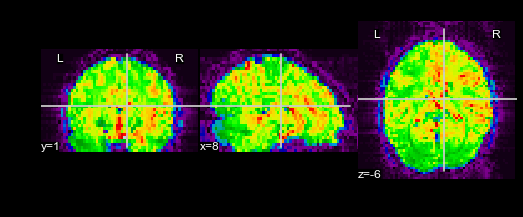

In [27]:
nilearn.plotting.plot_epi(nilearn.image.mean_img(nii))

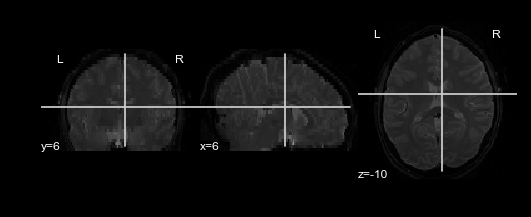

In [31]:
nilearn.plotting.plot_anat(os.path.join(datadir,"sub001/anatomy/inplane.nii.gz"))

__Exercise__: explore plotting options - could you plot the anatomical image as a series of axial slices?

## Nipype

Nipype is a python library for interacting tith various neuroimaging programs. It's primarly used for constructing workflows taht are later executed on many subjects on a cluster. For this workshop we will primarly use it to cache results or commandlines

In [32]:
from nipype.caching import Memory
from nipype.interfaces import fsl
mem = Memory(base_dir='.')


In [34]:
fslmean = mem.cache(fsl.maths.MeanImage)
fslmean_results = fslmean(in_file=os.path.join(datadir,"sub001/BOLD/task001_run001/bold.nii.gz"))
fslmean_results.outputs

INFO:workflow:Executing node 8e8664fad8dd5953abd1f57da135c70f in dir: /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/8e8664fad8dd5953abd1f57da135c70f
INFO:workflow:Running: fslmaths /Users/poldrack/data_unsynced/ds003/sub001/BOLD/task001_run001/bold.nii.gz -Tmean /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/8e8664fad8dd5953abd1f57da135c70f/bold_mean.nii.gz



out_file = /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/8e8664fad8dd5953abd1f57da135c70f/bold_mean.nii.gz

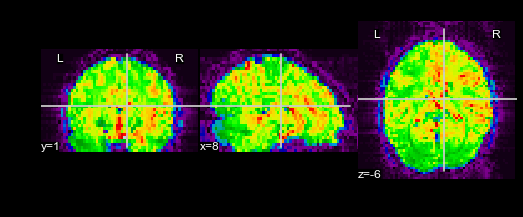

In [35]:
nilearn.plotting.plot_epi(fslmean_results.outputs.out_file)

Notice that if we run it again nothing get's recalculated - nipype will be smart enough to use the cache

In [37]:
fslmean_results = fslmean(in_file=os.path.join(datadir,"sub001/BOLD/task001_run001/bold.nii.gz"))
fslmean_results.outputs

INFO:workflow:Executing node 8e8664fad8dd5953abd1f57da135c70f in dir: /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/8e8664fad8dd5953abd1f57da135c70f
INFO:workflow:Collecting precomputed outputs



out_file = /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/8e8664fad8dd5953abd1f57da135c70f/bold_mean.nii.gz

But if we change the inputs new calculation will be triggered

In [38]:
fslmean_results = fslmean(in_file=os.path.join(datadir,"sub003/BOLD/task001_run001/bold.nii.gz"))
fslmean_results.outputs

INFO:workflow:Executing node fa522a8d47a4d37487eb172d3b12a1f0 in dir: /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/fa522a8d47a4d37487eb172d3b12a1f0
INFO:workflow:Running: fslmaths /Users/poldrack/data_unsynced/ds003/sub003/BOLD/task001_run001/bold.nii.gz -Tmean /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/fa522a8d47a4d37487eb172d3b12a1f0/bold_mean.nii.gz



out_file = /Users/poldrack/Dropbox/code/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/fa522a8d47a4d37487eb172d3b12a1f0/bold_mean.nii.gz